In [2]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from matplotlib import font_manager
import matplotlib.font_manager as fm
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

from konlpy.tag import Okt
from collections import Counter
from konlpy.tag import Komoran
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud



import numpy as np
import pandas as pd
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

['Malgun Gothic']


In [3]:
test = pd.read_csv('Project_data/data2/techworld.csv')

In [4]:
test['news_date'].value_counts().sort_index()

news_date
2022.05.01 11:00    1
2022.05.02 10:51    1
2022.05.02 11:49    2
2022.05.02 13:18    2
2022.05.02 13:37    1
                   ..
2023.05.30 09:23    1
2023.05.30 16:58    1
2023.05.31 10:42    1
2023.05.31 11:00    1
2023.05.31 15:24    1
Name: count, Length: 1260, dtype: int64

In [5]:
# 새로운 CSV 파일 경로 및 이름
test_file = 'Project_data/data2/techworld.csv'

# 데이터프레임을 새로운 CSV 파일로 저장
test.to_csv(test_file, index=False)

In [6]:
test_df = pd.read_table('Project_data/data2/techworld.csv', sep=',')
test_df

,news_date,news_title,news_text_sm,url_in,news_writer,news_thumbnail
0,2022.05.01 11:00,"삼성전자, 에듀테크 기업 키운다",삼성전자가 사내벤처 육성 프로그램 'C랩 인사이드'의 우수 과제 2개를 선정했다고 ...,https://www.epnc.co.kr/news/articleView.html?i...,이혜진 기자,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
1,2022.05.02 10:51,"마크비전, 페이크 웹사이트 모니터링 서비스 출시",마크비전은 일반 이커머스 플랫폼이 아닌 독립 웹사이트에서 판매되는 위조상품을 탐지·...,https://www.epnc.co.kr/news/articleView.html?i...,조명의 기자,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
2,2022.05.02 11:49,"투라인코드, NHN 클라우드 마켓플레이스 등록",투라인코드는 클라우드 네이티브 서비스를 쉽고 빠르게 구현할 수 있는 플랫폼 ‘냅(n...,https://www.epnc.co.kr/news/articleView.html?i...,조명의 기자,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
3,2022.05.02 11:49,"버넥트, 버넥트 테크 1기 채용 성료",버넥트가 신입 개발자를 대상으로 한 ‘버넥트 테크’ 1기 공개 채용을 성공적으로 마...,https://www.epnc.co.kr/news/articleView.html?i...,조명의 기자,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
4,2022.05.02 13:18,"솔트웨어, 지학사 AWS 도입 성공적 지원",솔트웨어는 교과서와 참고서 등을 포함해 다양한 교육사업을 제공하는 지학사에 아마존웹...,https://www.epnc.co.kr/news/articleView.html?i...,조명의 기자,https://cdn.epnc.co.kr/news/thumbnail/202205/2...
...,...,...,...,...,...,...
2028,2023.05.30 09:23,"한국레노버, 8세대 요가 신제품 3종 출시",한국레노버가 콘텐츠 크리에이터를 위한 뛰어난 성능과 다양한 기능 휴대성을 갖춘 프리...,https://www.epnc.co.kr/news/articleView.html?i...,김창수 기자,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
2029,2023.05.30 16:58,"티맥스티베로-인텔코리아, ‘비즈니스 연속성 혁신 전략’ 웨비나 개최",DBMS 전문 기업 티맥스티베로가 내달 1일에 ‘비즈니스 연속성 왜 혁신이 필요한가...,https://www.epnc.co.kr/news/articleView.html?i...,양승갑 기자,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
2030,2023.05.31 10:42,"에이서, ‘컴퓨텍스 2023’서 신제품·신기술 대거 공개",글로벌 PC제조사 에이서(Acer)가 30일부터 6월 2일까지 대만 타이베이에서 개...,https://www.epnc.co.kr/news/articleView.html?i...,김창수 기자,https://cdn.epnc.co.kr/news/thumbnail/202305/2...
2031,2023.05.31 11:00,"'슈퍼 메기' AI로 무장한 MS, 클라우드 시장 판도 바꿀까",인공지능(AI)이 발달하고 고도화됨에 따라 단순한 화제성을 넘어 클라우드 등 연관 ...,https://www.epnc.co.kr/news/articleView.html?i...,양승갑 기자,https://cdn.epnc.co.kr/news/thumbnail/202305/2...


In [7]:
okt = Okt()

In [8]:
data = pd.read_csv('Project_data/data2/techworld.csv', encoding='UTF-8')
data = data['news_title'][:15]
data = data.to_list()
data = ' ' .join(data)

In [9]:
noun_data = okt.nouns(data)

In [10]:
count_noun_data = Counter(noun_data)
filtered_count_noun_data = {word: count for word, count in count_noun_data.items() if count >= 2}

In [11]:
from datetime import datetime

# 데이터프레임에서 '제목' 열의 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(test_df['news_title'])

# Komoran 형태소 분석기 초기화
komoran = Komoran()

# 텍스트 토큰화 및 형태소 분석
tokens = word_tokenize(text)
pos_tags = komoran.pos(text)

# 불용어 파일 읽기
stop_words = []
with open('Project_data/data/불용.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

# 단어 등장 횟수를 저장할 딕셔너리 초기화
word_counts = {}


for text, date in zip(test_df['news_title'], test_df['news_date']):
    # 텍스트 토큰화 및 형태소 분석
    tokens = word_tokenize(text)
    pos_tags = komoran.pos(text)
    
    # 날짜 문자열을 datetime 객체로 변환
    datetime_obj = datetime.strptime(date, "%Y.%m.%d %H:%M")
    
    # 년도, 월, 일 추출
    year = str(datetime_obj.year)
    month = str(datetime_obj.month).zfill(2)  # 한 자리 월을 두 자리로 맞춤
    day = str(datetime_obj.day).zfill(2)  # 한 자리 일을 두 자리로 맞춤
    
    # 날짜를 합친 형식으로 표시
    full_date = f"{year}-{month}-{day}"
    
    # 불용어 제거 및 명사 추출
    filtered_tokens = [token for token in tokens if token not in stop_words]
    nouns = [token for token, pos in pos_tags if pos.startswith('N')]
    
    # 하루에 하나의 태그만 추출
    if full_date in word_counts:
        continue
    else:
        word_counts[full_date] = nouns
        
# 가장 많이 언급된 단어 추출
top_words_limit = 1
top_words = []
for date, words in word_counts.items():
    word_count = {}
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1
    
    sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    
    # 상위 단어 추출
    if sorted_words:
        top_word = sorted_words[0][0]
        top_words.append((date, top_word))

# 추출된 단어를 데이터프레임으로 변환
result_df = pd.DataFrame(top_words, columns=['Date', 'Tag'])

# 데이터프레임을 CSV 파일로 저장
result_df.to_csv('추출된_태그3.csv', index=False)

print(result_df)

           Date   Tag
0    2022-05-01  삼성전자
1    2022-05-02    마크
2    2022-05-03    양자
3    2022-05-04    한화
4    2022-05-06   네이버
..          ...   ...
266  2023-05-24  클라우드
267  2023-05-25    이노
268  2023-05-26     컴
269  2023-05-30     빅
270  2023-05-31   에이서

[271 rows x 2 columns]


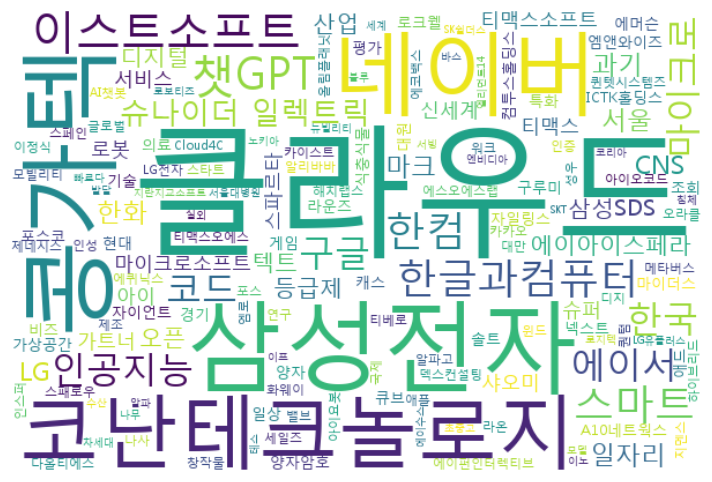

In [13]:
import re

# 폰트 설정
# font_prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

# 폰트 사이즈 설정
plt.rcParams['font.size'] = 12

# CSV 파일 불러오기
dataframe = pd.read_csv('추출된_태그3.csv')

# 텍스트 데이터 추출 및 전처리
text_data = ' '.join(dataframe['Tag'])
# 2글자 이상의 단어만 추출
text_data = ' '.join(re.findall(r'\b\w{2,}\b', text_data))

# 워드클라우드 생성
wordcloud = WordCloud(width=600, height=400, font_path='Project_data/data/malgun.ttf',background_color='white').generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# plt.savefig('test.png')